In [45]:
// https://www.tensorflow.org/swift/tutorials/python_interoperability
%include "EnableIPythonDisplay.swift"
print(Python.version)
import TensorFlow

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [8]:
let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
//let pd = Python.import("pandas")
let cv2 = Python.import("cv2")
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


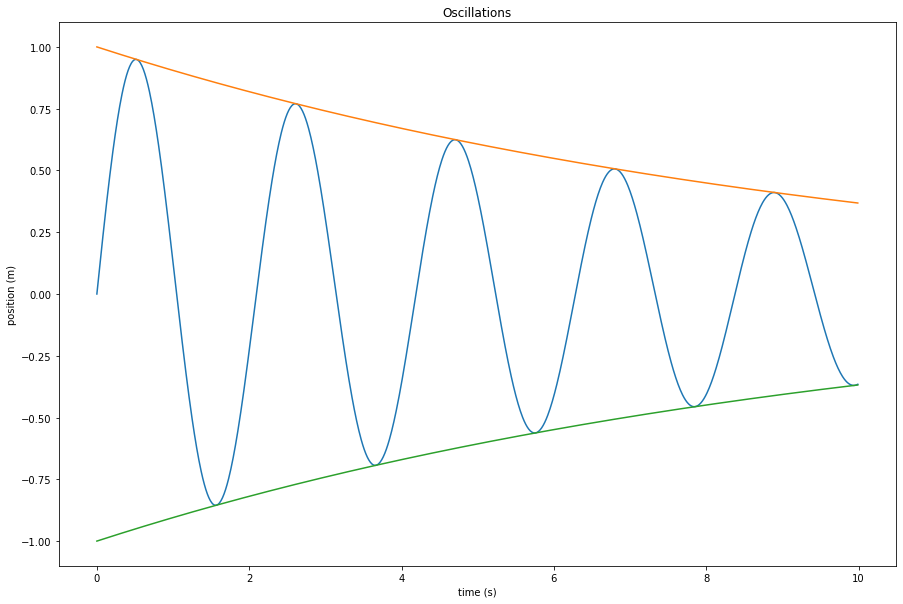

None


In [17]:
let time = np.arange(0, 10, 0.01)
let amplitude = np.exp(-0.1 * time)
let position = amplitude * np.sin(3 * time)

var fig = plt.figure(figsize: [15, 10])

plt.plot(time, position)
plt.plot(time, amplitude)
plt.plot(time, -amplitude)

plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.title("Oscillations")

plt.show()
fig.savefig("t.png")

In [ ]:
// Specify SwiftPM flags to use during package installation.
%install-swiftpm-flags -c release

// Install the DeckOfPlayingCards package from GitHub.
%install '.package(url: "https://github.com/NSHipster/DeckOfPlayingCards", from: "4.0.0")' DeckOfPlayingCards

In [45]:
import TensorFlow
//print(TensorFlow.Tensor<Float32>())

let hiddenSize: Int = 10
let layer1 = Dense<Float>(inputSize: 4, outputSize: hiddenSize, activation: relu)
layer1

▿ Dense<Float>
  - weight : [[  -0.5265602,   0.10623884,   0.05933398,  -0.10561478,    0.6367394,   -0.5287067,
     0.4584658,  -0.11900926,   0.17440838,  -0.44273466],
 [ 0.014653087,  -0.15268666,    0.0681991,  0.014089346,  -0.32659262,  -0.35511872,
  -0.059916615,    0.6241114,   0.17542714,  -0.21323445],
 [ -0.43709385,  -0.40717927,    0.3368383,  -0.33633164,   -0.1647507,  -0.14752817,
    -0.5261047,   0.19701463,   -0.3860761,    0.5806693],
 [-0.071056485,   -0.5509192,  -0.23419857,   0.00936991,   -0.2564736,  -0.40560704,
   -0.46104896,   0.38676894,     0.322154,    0.3191647]]
  - bias : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  - activation : (Function)
  - batched : false
  - useBias : true


In [43]:
let img = cv2.imread("baidu_resultlogo@2.png")
print(img.shape)
print(type(of: img))
print(type(of: img.shape))
plt.imshow(img)

(66, 202, 3)
PythonObject
PythonObject


AxesImage(54,36;334.8x217.44)


In [44]:
let shapedArray = ShapedArray<UInt8>(numpy: img)!
let tensor = Tensor<UInt8>(numpy: img)!
print(tensor.shape)

[66, 202, 3]


In [49]:
import Glibc

func sillyNegExp(_ x: Float) -> Float {
    let 𝑒 = Float(M_E)
    print("Taking 𝑒(\(𝑒)) to the power of \(-x)!")
    return pow(𝑒, -x)
}

@derivative(of: sillyNegExp)
func sillyDerivative(_ x: Float) -> (value: Float, pullback: (Float) -> Float) {
    let y = sillyNegExp(x)
    return (value: y, pullback: { v in -v * y })
}

print("exp(3) =", sillyExp(3))
print("𝛁exp(3) =", gradient(of: sillyExp)(3))

Taking 𝑒(2.7182817) to the power of -3.0!
exp(3) = 0.049787074
Taking 𝑒(2.7182817) to the power of -3.0!
𝛁exp(3) = -0.049787074
